# LINEAR MODEL

#### IMPORTS

In [112]:
from sklearn import *
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import NeighborhoodComponentsAnalysis
from tensorflow.keras.datasets import *
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.activations import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.losses import *
from tensorflow.keras.metrics import *
from tensorflow.keras.initializers import *
from tensorflow.keras.utils import *
from tensorflow.keras.models import *
import random
import cv2

#### DATASET

In [113]:
# LOAD DATA

def getDataset():
    
    (train_images, train_label), (test_images, test_label) = cifar10.load_data()

    class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                   'dog', 'frog', 'horse', 'ship', 'truck']
    
    return class_names, train_images, train_label, test_images, test_label

class_names, train_images, train_label, test_images, test_label = getDataset()
print(train_images.shape, train_label.shape, test_images.shape, test_label.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


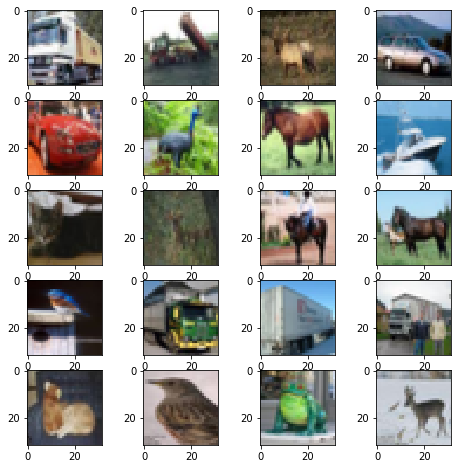

In [114]:
# SHOW SAMPLE

def plotSample(class_names, train_images, train_label):
    
    w=10
    h=10
    fig=plt.figure(figsize=(8, 8))
    columns = 4
    rows = 5
    for i in range(1, columns*rows +1):
        img = train_images[i]
        fig.add_subplot(rows, columns, i)
        plt.imshow(img)
    plt.show()

plotSample(class_names, train_images, train_label)

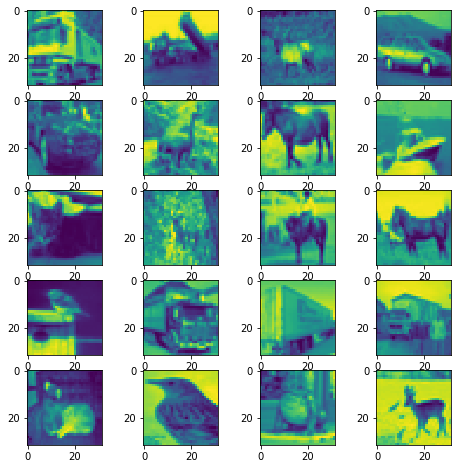

In [115]:
# Gray Scale
def toGrayScale(x_train):
    
    x_gray_train = []
    
    for x in x_train:
        
        x_gray_train.append(cv2.cvtColor(x, cv2.COLOR_BGR2GRAY))
    
    return np.array(x_gray_train)

plotSample(class_names, toGrayScale(train_images), train_label)

### SIMPLE SEQUENTIAL WITHOUT HIDDEN LAYERS

#### EVALUATION FUNCTION

In [116]:
def history_model(history, modelName):
  
    plt.subplot(121)
    plt.plot(history['sparse_categorical_accuracy'])
    plt.plot(history['val_sparse_categorical_accuracy'])
    plt.title(modelName + ' Accuracy')
    plt.ylabel('sparse_categorical_accuracy')
    plt.xlabel('epochs')
    plt.ylim([0.0,1.0])
    plt.legend(['train_accuracy', 'val_sparse_categorical_accuracy'])

    plt.subplot(122)
    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    plt.title(modelName + ' Loss')
    plt.ylabel('loss')
    plt.xlabel('epochs')
    plt.ylim([0.0,3.0])
    plt.legend(['train_loss', 'val_loss'])

    plt.show()

In [117]:
def confusion(class_names, test_label, predict_one_hot):

    predict1D = []
    for pred in predict_one_hot:
        predict1D.append(pred.argmax())
    predict1D = np.array(predict1D)
    
    cm = tf.math.confusion_matrix(labels=test_label, predictions=predict1D, num_classes=len(class_names))
    
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.tight_layout()
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, range(len(class_names)))
    plt.yticks(tick_marks, range(len(class_names)))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    
    plt.show()

In [125]:
def plot_error(class_names, model, test_images, test_label):
    
    predict = model.predict(test_images)
   
    for i in range(0, len(class_names)):
        
        for j in range(0, predict.shape[0]):
            
            if(test_label[j] == i and i != predict[j].argmax()):
                
                plt.imshow(test_images[j])
                plt.show()
                print("sample: {0} precition: {1}".format(class_names[i], class_names[predict[j].argmax()]))
                break

#### COLOR

In [119]:
class_names, train_images, train_label, test_images, test_label = getDataset()

#### MODEL

In [120]:
def create_model():
    model = Sequential()
    model.add(Flatten(input_shape=(32, 32, 3)))
    model.add(Dense(10, activation="softmax"))
    model.compile(loss=sparse_categorical_crossentropy,
                  metrics=[sparse_categorical_accuracy])
    return model

model = create_model()
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                30730     
Total params: 30,730
Trainable params: 30,730
Non-trainable params: 0
_________________________________________________________________
None


In [121]:
# formate data
train_images = train_images / 255
test_images = test_images / 255

In [122]:
EPOCHS=50
BATCH_SIZE=128

In [123]:
history = model.fit(train_images, train_label, validation_data=(test_images, test_label),
          epochs=EPOCHS,
          batch_size=BATCH_SIZE)

model.save('saved_model/linear_seq/')

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s 58us/sample - loss: 2.1826 - sparse_categorical_accuracy: 0.2561 - val_loss: 2.1054 - val_sparse_categorical_accuracy: 0.2868
Epoch 2/50
50000/50000 [==============================] - 3s 50us/sample - loss: 2.0530 - sparse_categorical_accuracy: 0.3048 - val_loss: 2.0841 - val_sparse_categorical_accuracy: 0.3122
Epoch 3/50
50000/50000 [==============================] - 3s 51us/sample - loss: 2.0259 - sparse_categorical_accuracy: 0.3134 - val_loss: 2.0424 - val_sparse_categorical_accuracy: 0.3079
Epoch 4/50
50000/50000 [==============================] - 3s 51us/sample - loss: 1.9952 - sparse_categorical_accuracy: 0.3252 - val_loss: 1.9137 - val_sparse_categorical_accuracy: 0.3392
Epoch 5/50
50000/50000 [==============================] - 3s 55us/sample - loss: 1.9836 - sparse_categorical_accuracy: 0.3324 - val_loss: 2.0236 - val_sparse_categorical_accuracy: 0.3238
Epoch 6/50
5000

50000/50000 [==============================] - 3s 62us/sample - loss: 1.8822 - sparse_categorical_accuracy: 0.3691 - val_loss: 2.1790 - val_sparse_categorical_accuracy: 0.3062
Epoch 45/50
50000/50000 [==============================] - 3s 56us/sample - loss: 1.8823 - sparse_categorical_accuracy: 0.3705 - val_loss: 2.0443 - val_sparse_categorical_accuracy: 0.3375
Epoch 46/50
50000/50000 [==============================] - 3s 65us/sample - loss: 1.8776 - sparse_categorical_accuracy: 0.3717 - val_loss: 2.2742 - val_sparse_categorical_accuracy: 0.3146
Epoch 47/50
50000/50000 [==============================] - 3s 68us/sample - loss: 1.8778 - sparse_categorical_accuracy: 0.3709 - val_loss: 1.9455 - val_sparse_categorical_accuracy: 0.3486
Epoch 48/50
50000/50000 [==============================] - 3s 65us/sample - loss: 1.8757 - sparse_categorical_accuracy: 0.3737 - val_loss: 2.0762 - val_sparse_categorical_accuracy: 0.3280
Epoch 49/50
50000/50000 [==============================] - 3s 57us/sampl

#### EVALUATION

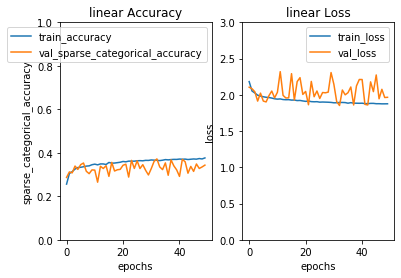

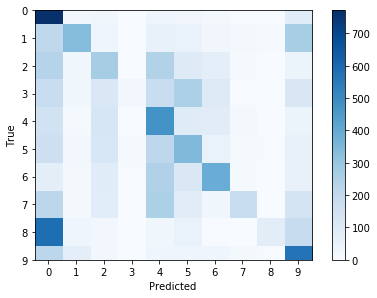

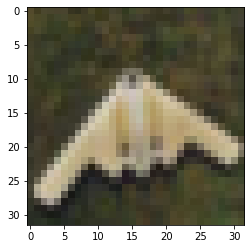

sample: airplane precition: frog


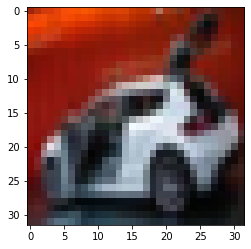

sample: automobile precition: dog


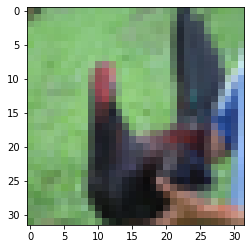

sample: bird precition: frog


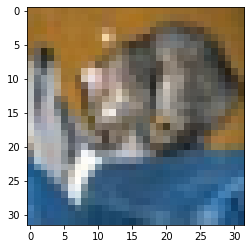

sample: cat precition: frog


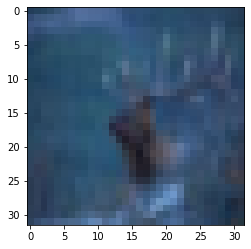

sample: deer precition: airplane


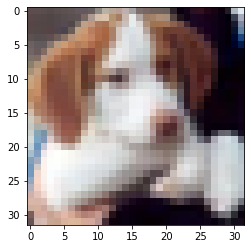

sample: dog precition: airplane


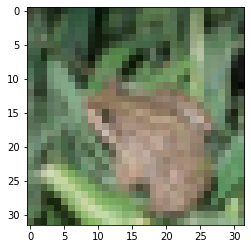

sample: frog precition: deer


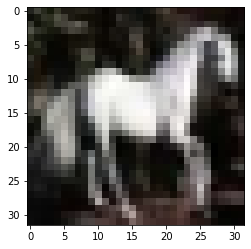

sample: horse precition: airplane


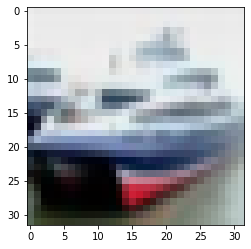

sample: ship precition: truck


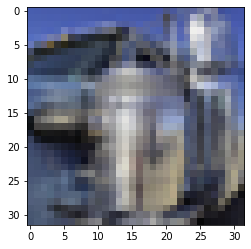

sample: truck precition: airplane


In [126]:
history_model(history.history, "linear")
confusion(class_names, test_label, model.predict(test_images))
plot_error(class_names, model, test_images, test_label)

### GRAYSCALE

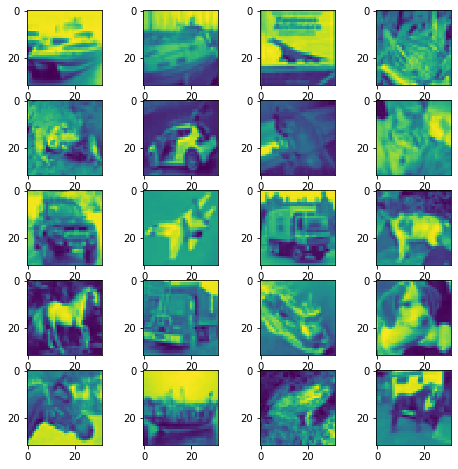

In [127]:
class_names, train_images, train_label, test_images, test_label = getDataset()
train_images = toGrayScale(train_images)
test_images = toGrayScale(test_images)
plotSample(class_names, test_images, test_label)

In [128]:
def create_model():
    model = Sequential()
    model.add(Flatten(input_shape=(32, 32)))
    model.add(Dense(10, activation="softmax"))
    model.compile(loss=sparse_categorical_crossentropy,
                  metrics=[sparse_categorical_accuracy])
    return model

model = create_model()
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                10250     
Total params: 10,250
Trainable params: 10,250
Non-trainable params: 0
_________________________________________________________________
None


In [129]:
# formate data
train_images = train_images / 255
test_images = test_images / 255

In [130]:
EPOCHS=50
BATCH_SIZE=128

In [131]:
history = model.fit(train_images, train_label, validation_data=(test_images, test_label),
          epochs=EPOCHS,
          batch_size=BATCH_SIZE)

model.save('saved_model/linear_seq_gray/')

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s 55us/sample - loss: 2.1470 - sparse_categorical_accuracy: 0.2189 - val_loss: 2.1669 - val_sparse_categorical_accuracy: 0.2196
Epoch 2/50
50000/50000 [==============================] - 2s 41us/sample - loss: 2.0863 - sparse_categorical_accuracy: 0.2518 - val_loss: 2.0841 - val_sparse_categorical_accuracy: 0.2556
Epoch 3/50
50000/50000 [==============================] - 2s 40us/sample - loss: 2.0723 - sparse_categorical_accuracy: 0.2630 - val_loss: 2.0801 - val_sparse_categorical_accuracy: 0.2630
Epoch 4/50
50000/50000 [==============================] - 2s 40us/sample - loss: 2.0609 - sparse_categorical_accuracy: 0.2666 - val_loss: 2.0475 - val_sparse_categorical_accuracy: 0.2751
Epoch 5/50
50000/50000 [==============================] - 2s 41us/sample - loss: 2.0533 - sparse_categorical_accuracy: 0.2742 - val_loss: 2.0816 - val_sparse_categorical_accuracy: 0.2548
Epoch 6/50
5000

50000/50000 [==============================] - 2s 35us/sample - loss: 1.9859 - sparse_categorical_accuracy: 0.3045 - val_loss: 2.0765 - val_sparse_categorical_accuracy: 0.2664
Epoch 45/50
50000/50000 [==============================] - 2s 34us/sample - loss: 1.9858 - sparse_categorical_accuracy: 0.3035 - val_loss: 2.0406 - val_sparse_categorical_accuracy: 0.2855
Epoch 46/50
50000/50000 [==============================] - 2s 39us/sample - loss: 1.9831 - sparse_categorical_accuracy: 0.3071 - val_loss: 2.0798 - val_sparse_categorical_accuracy: 0.2703
Epoch 47/50
50000/50000 [==============================] - 2s 38us/sample - loss: 1.9835 - sparse_categorical_accuracy: 0.3024 - val_loss: 2.1903 - val_sparse_categorical_accuracy: 0.2371
Epoch 48/50
50000/50000 [==============================] - 2s 42us/sample - loss: 1.9827 - sparse_categorical_accuracy: 0.3050 - val_loss: 2.0446 - val_sparse_categorical_accuracy: 0.2664
Epoch 49/50
50000/50000 [==============================] - 2s 46us/sampl

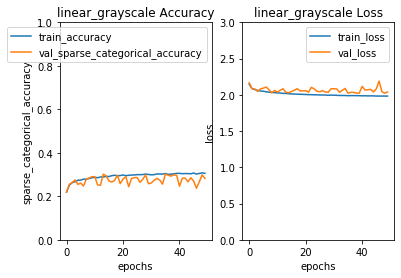

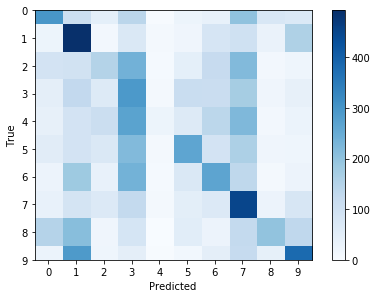

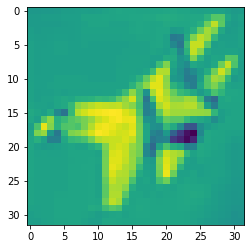

sample: airplane precition: cat


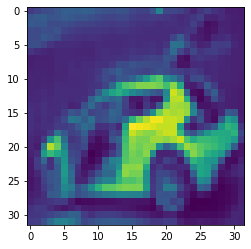

sample: automobile precition: frog


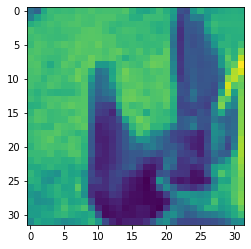

sample: bird precition: automobile


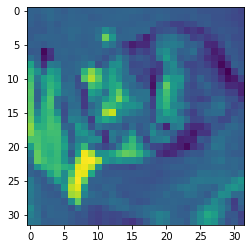

sample: cat precition: frog


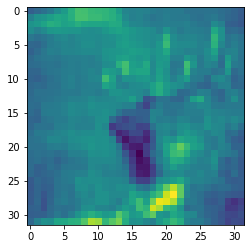

sample: deer precition: horse


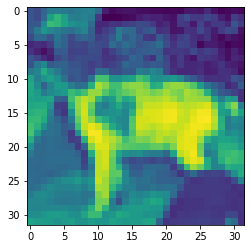

sample: dog precition: automobile


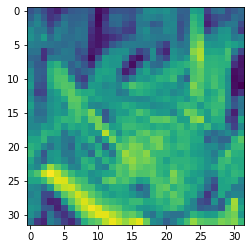

sample: frog precition: cat


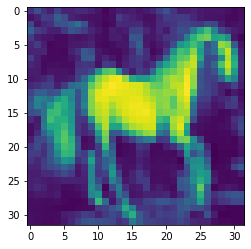

sample: horse precition: frog


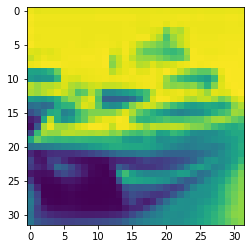

sample: ship precition: truck


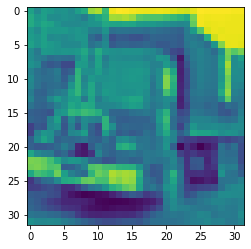

sample: truck precition: horse


In [132]:
history_model(history.history, "linear_grayscale")
confusion(class_names, test_label, model.predict(test_images))
plot_error(class_names, model, test_images, test_label)

### LINEAR DISCRIMINANT ANALYSIS

#### EVALUATION FUNCTION

In [136]:
def accuracy(model, x_test, y_test):
    correct_values = 0
    i = 0
    
    while i < x_test.shape[0]:
        
        if model.predict(x_test[i].reshape(1, -1)) == y_test[i]:
            correct_values += 1
        i += 1
        
    return correct_values / x_test.shape[0]

In [137]:
def confusion(model, class_names, x_test, y_test):
    
    x_test_predict = []
    
    for x in x_test:
        x_test_predict.append(model.predict(x.reshape(1, -1)))
    
    x_test_predict = np.array(x_test_predict)
    
    cm = metrics.confusion_matrix(x_test_predict, y_test)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    
    plt.tight_layout()
    plt.colorbar()
    tick_marks = np.arange(10)
    plt.xticks(tick_marks, range(10))
    plt.yticks(tick_marks, range(10))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    
    plt.show()
    
    for i in range(0, len(class_names)):

        print(i, ": ", class_names[i])

In [152]:
def plot_error(class_names, model, test_images, test_label, grayscale=False):
    
   
    for i in range(0, len(class_names)):
    
        for j in range(0, test_images.shape[0]):
            
            predict = model.predict(test_images[j].reshape(1, -1)).astype(int)
            if(test_label[j] == i and i != predict[0]):
                
                if not grayscale:
                    plt.imshow(test_images[j].reshape(32, 32, 3))
                else:
                    plt.imshow(test_images[j].reshape(32, 32))
                plt.show()
                print("sample: {0} precition: {1}".format(class_names[i], class_names[predict[0]]))
                break

#### COLOR

##### DATASET

In [139]:
# Load data
class_names, train_images, train_label, test_images, test_label = getDataset()

# format data
train_images = train_images.reshape(50000, 3072)
train_images = train_images / 255

test_images = test_images.reshape(10000, 3072)
test_images = test_images / 255

train_label = train_label.astype(float)
test_label = test_label.astype(float)


print(train_images.shape, train_label.shape, test_images.shape, test_label.shape)

(50000, 3072) (50000, 1) (10000, 3072) (10000, 1)


##### MODEL

In [140]:
ldaColor = LinearDiscriminantAnalysis()
ldaColor.fit(train_images, np.ravel(train_label, order='C'))

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

##### EVALUATION

Accuracy on color Dataset ->  0.3713
Confusion matrix for color dataset: 


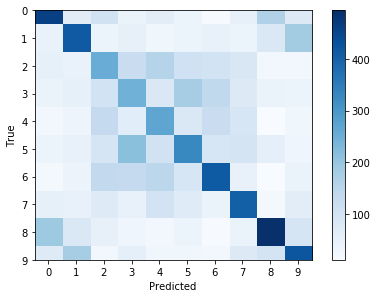

0 :  airplane
1 :  automobile
2 :  bird
3 :  cat
4 :  deer
5 :  dog
6 :  frog
7 :  horse
8 :  ship
9 :  truck


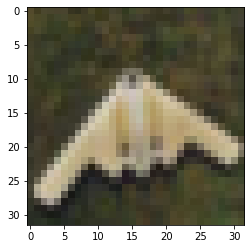

sample: airplane precition: cat


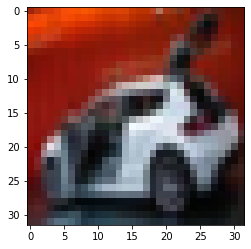

sample: automobile precition: cat


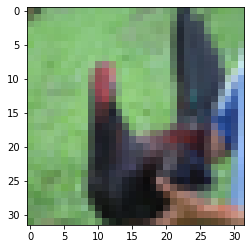

sample: bird precition: frog


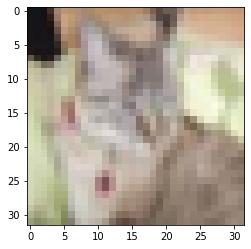

sample: cat precition: dog


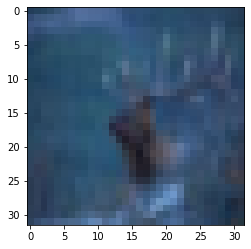

sample: deer precition: airplane


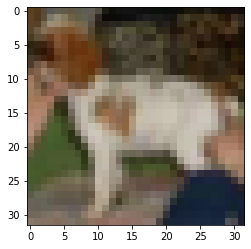

sample: dog precition: cat


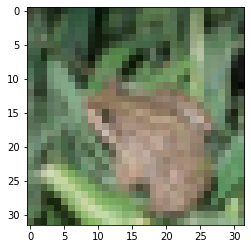

sample: frog precition: deer


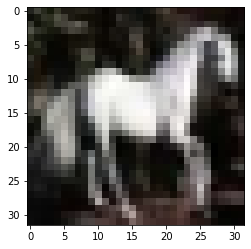

sample: horse precition: ship


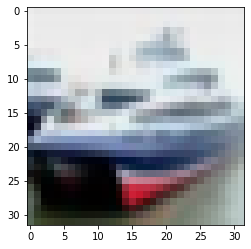

sample: ship precition: truck


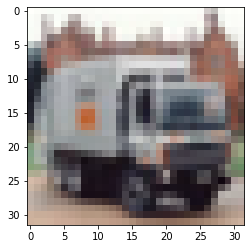

sample: truck precition: automobile


In [147]:
print("Accuracy on color Dataset -> ", accuracy(ldaColor, test_images, test_label))
print("Confusion matrix for color dataset: ")
confusion(ldaColor, class_names, test_images, test_label)
plot_error(class_names, ldaColor, test_images, test_label)

#### GRAYSCALE

##### DATASET

In [148]:
class_names, train_images, train_label, test_images, test_label = getDataset()

train_images = toGrayScale(train_images)
test_images = toGrayScale(test_images)

train_images = train_images.reshape(50000, 32 * 32)
test_images = test_images.reshape(10000, 32 * 32)

train_images = train_images / 255
test_images = test_images / 255

##### MODEL

In [149]:
ldaGray = LinearDiscriminantAnalysis()
ldaGray.fit(train_images, np.ravel(train_label, order='C'))

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

##### EVALUATION

Accuracy on gray Dataset ->  0.2829
Confusion matrix for gray dataset: 


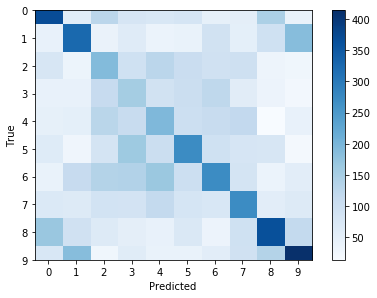

0 :  airplane
1 :  automobile
2 :  bird
3 :  cat
4 :  deer
5 :  dog
6 :  frog
7 :  horse
8 :  ship
9 :  truck


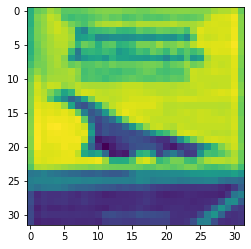

sample: airplane precition: ship


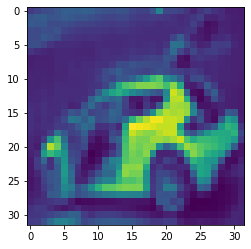

sample: automobile precition: frog


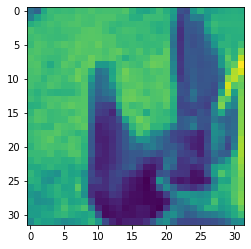

sample: bird precition: frog


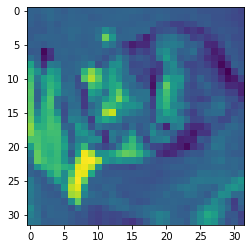

sample: cat precition: frog


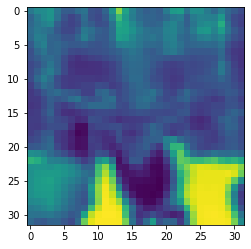

sample: deer precition: frog


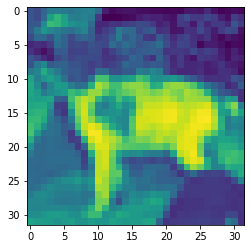

sample: dog precition: deer


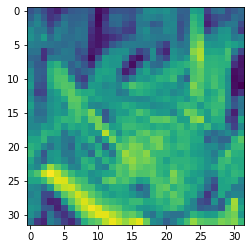

sample: frog precition: dog


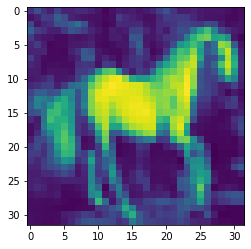

sample: horse precition: ship


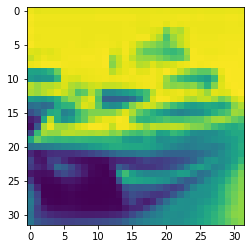

sample: ship precition: truck


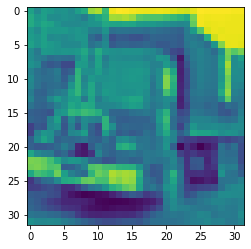

sample: truck precition: horse


In [153]:
print("Accuracy on gray Dataset -> ", accuracy(ldaGray, test_images, test_label))
print("Confusion matrix for gray dataset: ")
confusion(ldaGray, class_names, test_images, test_label)
plot_error(class_names, ldaGray, test_images, test_label, True)